In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-06-29 00:03:38--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.14.240, 172.217.3.176, 172.217.14.208
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.14.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.07s   

2020-06-29 00:03:38 (1.20 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [8]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len -1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(.2))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
bidirectional_9 (Bidirection (None, 300)               541200    
_________________________________________________________________
dense_4 (Dense)              (None, 1605)              483105    
_________________________________________________________________
dense_5 (Dense)              (None, 3211)              5156866   
Total params: 6,803,471
Trainable params: 6,803,471
Non-trainable params: 0
____________________________________________

In [10]:
 history = model.fit(predictors, label, epochs=10, verbose=1)

Epoch 1/10
484/484 [==============================] - 31s 64ms/step - loss: 6.6749 - accuracy: 0.0213
Epoch 2/10
484/484 [==============================] - 31s 63ms/step - loss: 6.4924 - accuracy: 0.0224
Epoch 3/10
484/484 [==============================] - 73s 150ms/step - loss: 6.3633 - accuracy: 0.0288
Epoch 4/10
484/484 [==============================] - 37s 77ms/step - loss: 6.2281 - accuracy: 0.0360
Epoch 5/10
484/484 [==============================] - 41s 85ms/step - loss: 6.1077 - accuracy: 0.0373
Epoch 6/10
484/484 [==============================] - 42s 87ms/step - loss: 5.9976 - accuracy: 0.0404
Epoch 7/10
484/484 [==============================] - 40s 82ms/step - loss: 5.8755 - accuracy: 0.0441
Epoch 8/10
484/484 [==============================] - 37s 77ms/step - loss: 5.7510 - accuracy: 0.0488
Epoch 9/10
484/484 [==============================] - 37s 77ms/step - loss: 5.6220 - accuracy: 0.0605
Epoch 10/10
484/484 [==============================] - 37s 77ms/step - loss: 5.49

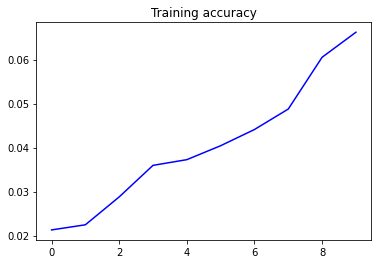

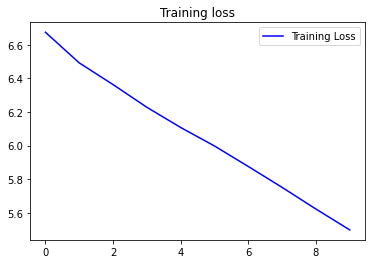

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [12]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope of be night to be time be night to thee to be night to thee to be night to thee be a face to be night to thee be time to be time to thee to be time to be time to be time to be time to be time to be time to be time to be time to be time to be time to be time to be time to be time to be time to be time to be time to be time to be time to be time to be time to be time to be
